In [9]:
import pandas as pd
df_train = pd.read_csv(r"clean_train.csv",nrows = 2000000)
df_test = pd.read_csv(r"test.csv")

In [10]:
import tensorflow as tf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras import optimizers
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras.backend as K

from keras.layers import BatchNormalization


In [11]:
df_train, df_val = train_test_split(df_train, test_size=0.10, random_state=1)

val_target = df_val['fare_amount'].values

fare_amount          1.000000
pickup_longitude     0.384787
pickup_latitude     -0.189889
dropoff_longitude    0.296193
dropoff_latitude    -0.153553
passenger_count      0.014565
latitude_diff       -0.017954
longitude_diff       0.086691
hour                -0.019373
day                  0.001041
month                0.024600
year                 0.117368
weekday              0.002982
quarter_of_year      0.022137
trip_distance_km     0.810781
dtype: float64
para shape:  9


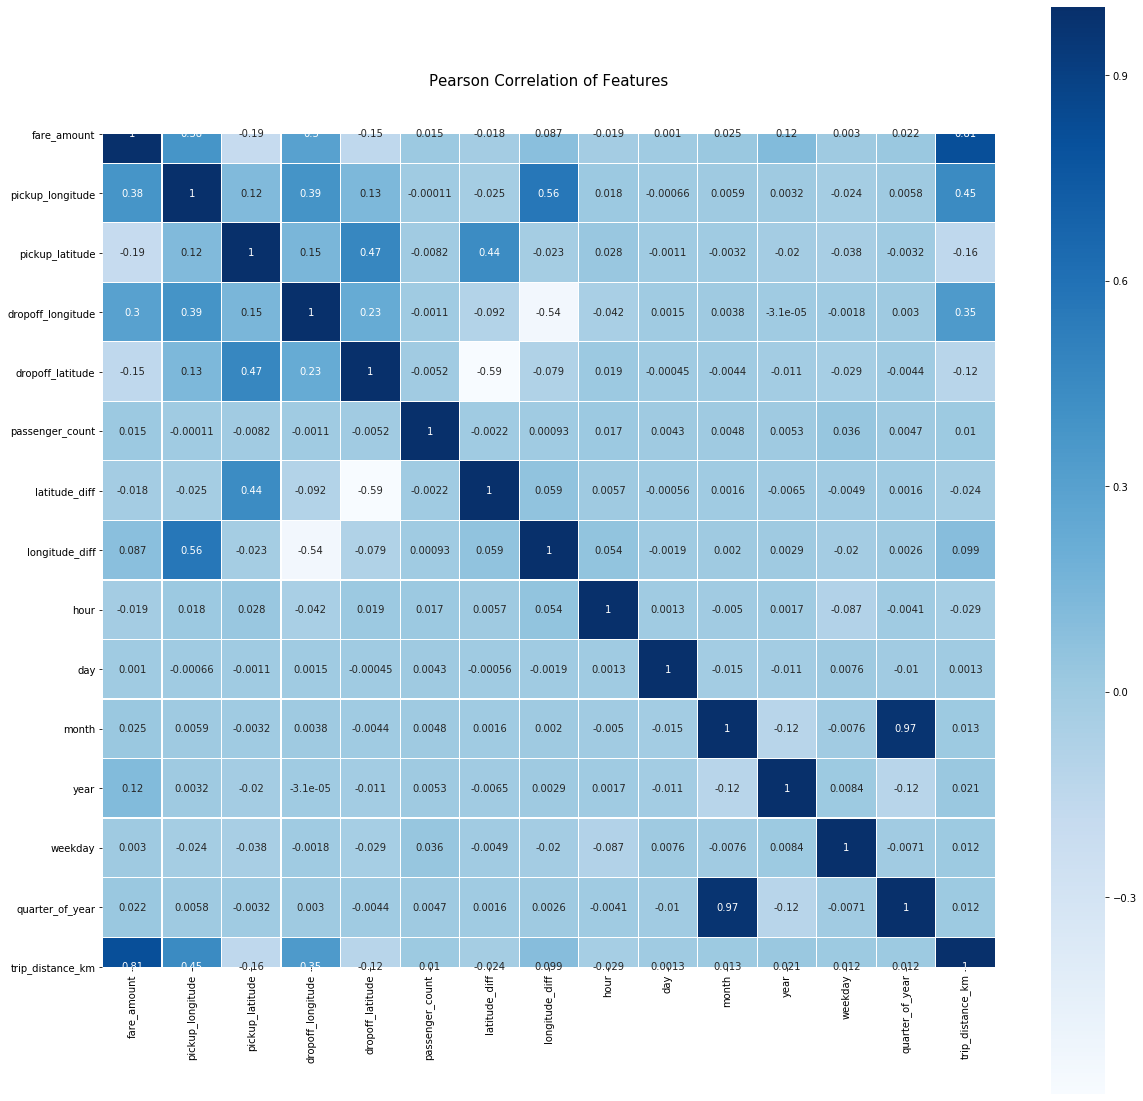

In [12]:
 
def distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    return np.abs(dropoff_lat - pickup_lat) + np.abs(dropoff_long - pickup_long)   
    
def add_new_features(df):
    plat = df['pickup_latitude']
    dlat = df['dropoff_latitude']
    plon = df['pickup_longitude']
    dlon = df['dropoff_longitude']

    
    df['latitude_diff'] = (plat - dlat)
    df['longitude_diff'] = (plon - dlon)
    
    df['pickup_datetime'] = df['pickup_datetime'].str.slice(0, 16)
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True, format='%Y-%m-%d %H:%M')
    
    df['hour'] = df['pickup_datetime'].dt.hour
    df['day'] = df['pickup_datetime'].dt.day
    df['month'] = df['pickup_datetime'].dt.month
    df['year'] = df['pickup_datetime'].dt.year
    df['weekday'] = df['pickup_datetime'].dt.weekday
    df['quarter_of_year'] = df['pickup_datetime'].dt.quarter
    df['trip_distance_km'] = distance(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)
    
    return df


df_train = add_new_features(df_train)
df_val = add_new_features(df_val)
df_test = add_new_features(df_test)


colormap = 'Blues'
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


print(df_train.corrwith(df_train['fare_amount']))


test_x = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
train_x = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
val_x = df_val[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]

train_y = df_train.fare_amount
val_y = df_val.fare_amount
print("data shape: ",train_x.shape[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 943717 samples, validate on 104858 samples
Epoch 1/80
943717/943717 [==============================] - 347s 367us/step - loss: 66.5836 - rmse: 5.3891 - val_loss: 32.2634 - val_rmse: 2.6710
Epoch 2/80
943717/943717 [==============================] - 369s 391us/step - loss: 26.4946 - rmse: 2.5787 - val_loss: 30.8456 - val_rmse: 2.5352
Epoch 3/80
943717/943717 [==============================] - 382s 405us/step - loss: 25.9835 - rmse: 2.5346 - val_loss: 30.4535 - val_rmse: 2.5491
Epoch 4/80
943717/943717 [==============================] - 406s 430us/step - loss: 25.6206 - rmse: 2.5044 - val_loss: 29.9955 - val_rmse: 2.4070
Epoch 5/80
943717/943717 [==============================] - 347s 367us/step - loss: 25.3217 - rmse: 2.4841 - val_loss: 31.1690 - val_rmse: 2.5918
Epoch 6/80
943717/943717 [==============================] - 391s 415us/step - loss: 25.1736 - rmse

Epoch 53/80
943717/943717 [==============================] - 341s 361us/step - loss: 23.9283 - rmse: 2.4039 - val_loss: 39.7331 - val_rmse: 2.6501
Epoch 54/80
943717/943717 [==============================] - 353s 374us/step - loss: 23.8758 - rmse: 2.4004 - val_loss: 39.5681 - val_rmse: 2.5577
Epoch 55/80
943717/943717 [==============================] - 349s 369us/step - loss: 23.7950 - rmse: 2.3993 - val_loss: 43.2342 - val_rmse: 2.5828
Epoch 56/80
943717/943717 [==============================] - 346s 366us/step - loss: 23.8166 - rmse: 2.4020 - val_loss: 35.1482 - val_rmse: 2.5948
Epoch 57/80
943717/943717 [==============================] - 329s 349us/step - loss: 23.8861 - rmse: 2.4032 - val_loss: 36.0961 - val_rmse: 2.6142
Epoch 58/80
943717/943717 [==============================] - 342s 363us/step - loss: 23.9848 - rmse: 2.4019 - val_loss: 37.6447 - val_rmse: 2.5710
Epoch 59/80
943717/943717 [==============================] - 360s 382us/step - loss: 23.9133 - rmse: 2.3997 - val_loss

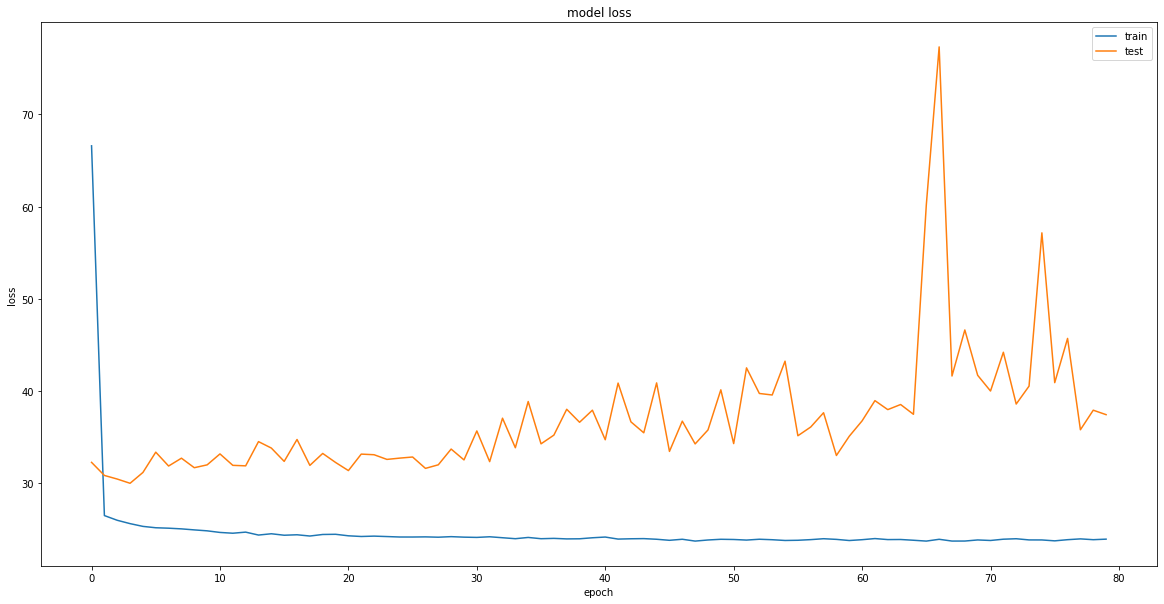

In [13]:


def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

test_x = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
train_x = df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]
val_x = df_val[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','latitude_diff','longitude_diff','trip_distance_km','year']]

model1 = Sequential()
model1.add(Dropout(0.2,input_shape=(train_x.shape[1],)))
model1.add(BatchNormalization())
model1.add(Dense(2048,activation='relu'))#2048 neurons in input layer
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(1024,activation='relu')) #1024 neurons in hidden layer
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu')) #512 neurons in hidden layer
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(512,activation='relu')) #512 neurons in hidden layer
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(256,activation='relu')) #256 neurons in hidden layer
model1.add(Dropout(0.2))
model1.add(BatchNormalization())
model1.add(Dense(256,activation='relu')) #256 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(128,activation='relu'))  # 128 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(64,activation='relu'))   # 64 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(32,activation='relu'))   # 32 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(16,activation='relu')) # 16 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(8,activation='relu')) # 8 neurons in hidden layer
model1.add(BatchNormalization())
model1.add(Dense(1)) # 1 neuron in output layer

adamax=optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

model1.compile(optimizer=adamax,loss='mse', metrics=[rmse])

estimator2 = model1.fit(x=train_x,y=train_y, batch_size=1000, epochs=80, 
                    verbose=1, validation_data=(val_x,val_y), 
                    shuffle=True)

def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
plot_loss_accuracy(estimator2)

In [15]:
ypred1 = model1.predict(val_x, batch_size=128, verbose=1)

104858/104858 [==============================] - 11s 103us/step


In [17]:
def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))


model = Sequential()
model.add(Dropout(0.2,input_shape=(train_x.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))#512 neurons in input layer
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu')) #256 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))  # 128 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))   # 64 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))   # 32 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(16,activation='relu')) # 16 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(8,activation='relu')) # 8 neurons in hidden layer
model.add(BatchNormalization())
model.add(Dense(1)) # 1 neuron in output layer


model.compile(optimizer='adam',loss='mse', metrics=[rmse])

estimator = model.fit(x=train_x,y=train_y, batch_size=1000, epochs=80, 
                    verbose=1, validation_data=(val_x,val_y), 
                    shuffle=True)

Train on 943717 samples, validate on 104858 samples
Epoch 1/80
943717/943717 [==============================] - 39s 41us/step - loss: 89.9094 - rmse: 7.0472 - val_loss: 36.3461 - val_rmse: 3.2227
Epoch 2/80
943717/943717 [==============================] - 40s 43us/step - loss: 26.6739 - rmse: 2.5180 - val_loss: 30.0524 - val_rmse: 2.4607
Epoch 3/80
943717/943717 [==============================] - 42s 44us/step - loss: 25.4972 - rmse: 2.4959 - val_loss: 29.8466 - val_rmse: 2.4068
Epoch 4/80
943717/943717 [==============================] - 41s 44us/step - loss: 25.1776 - rmse: 2.4697 - val_loss: 32.9159 - val_rmse: 2.7082
Epoch 5/80
943717/943717 [==============================] - 42s 44us/step - loss: 25.0657 - rmse: 2.4541 - val_loss: 29.6979 - val_rmse: 2.4239
Epoch 6/80
943717/943717 [==============================] - 42s 45us/step - loss: 24.8641 - rmse: 2.4445 - val_loss: 28.3544 - val_rmse: 2.3351
Epoch 7/80
943717/943717 [==============================] - 43s 46us/step - loss: 24

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_7 (Dropout)          (None, 9)                 0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 9)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 512)               5120      
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_15 (Batc (None, 256)              

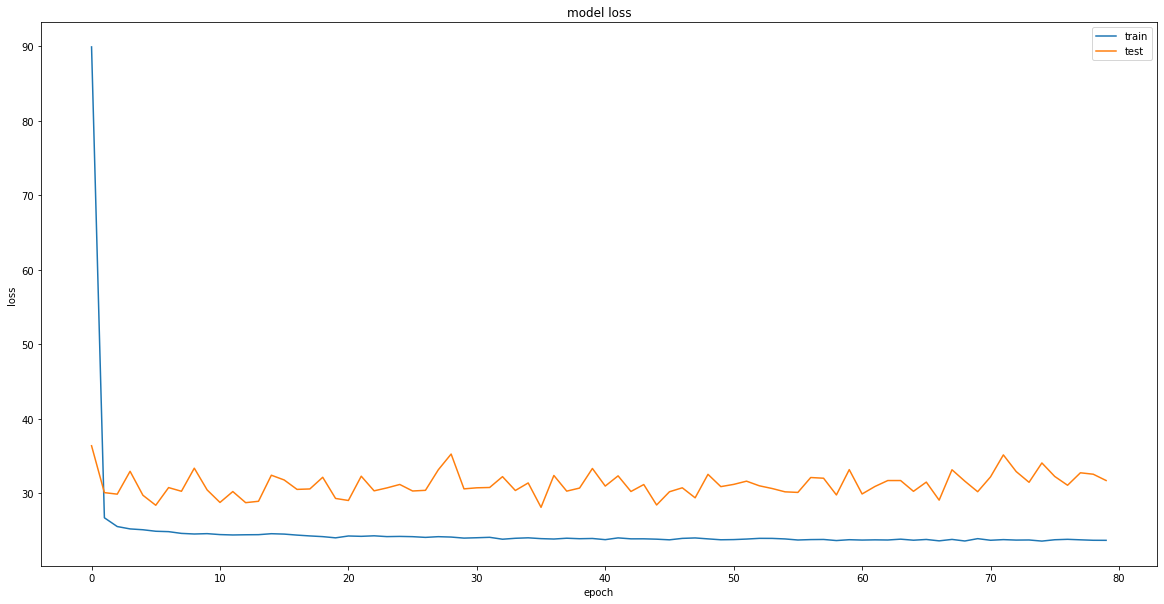

In [19]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(20,10))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
plot_loss_accuracy(estimator)


In [20]:
ypred = model.predict(val_x, batch_size=128, verbose=1)

104858/104858 [==============================] - 2s 20us/step


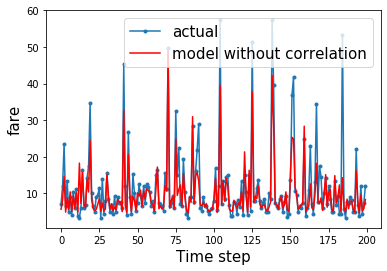

In [23]:
aa=[x for x in range(200)]
plt.plot(aa, val_y[:200], marker='.', label="actual")
plt.plot(aa, ypred[:200], 'r', label="model without correlation")
plt.ylabel('fare', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

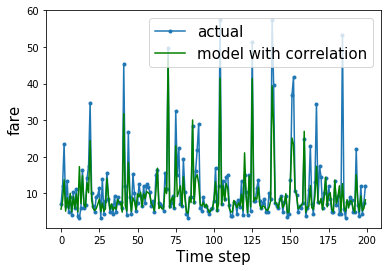

In [24]:
aa=[x for x in range(200)]
plt.plot(aa, val_y[:200], marker='.', label="actual")
plt.plot(aa, ypred1[:200],'g',label="model with correlation")
plt.ylabel('fare', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

### Reference
#### https://keras.io/getting-started/sequential-model-guide/